### recursivecharactertextsplitter
* 일반적인 텍스트에 가장 권장되는 방식
* 문자 목록을 매개변수로 받아 동작 ["\n\n","\n"," ", ""]
* 단락 -> 문장 -> 단어순으로 분할을 한다


In [1]:
with open("./data/appendix-keywords.txt") as f:
    file = f.read()

In [2]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=250,
    chunk_overlap=50,
    length_function=len,
    
    is_separator_regex=False
)

In [3]:
#file텍스트를 문서로 분할
texts = text_splitter.create_documents([file])

print(texts[0])
print("==="*20)
print(texts[0])

page_content='정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding'
page_content='정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding'


In [4]:
from collections import Counter
import re

# 파일 읽기
with open("./data/appendix-keywords.txt", encoding="utf-8") as f:
    text = f.read()

# 1. 텍스트 전처리: 특수문자 제거, 소문자 변환
text = text.lower()  # 소문자로 변환
text = re.sub(r'[^a-zA-Z가-힣\s]', '', text)  # 영어, 한글, 공백을 제외한 문자 제거

# 2. 단어 토큰화: 공백 기준으로 단어 분리
words = text.split()

# 3. 불용어 제거: 분석에 필요 없는 단어 필터링
stopwords = set(['the', 'is', 'in', 'and', 'to', '있습니다', '그리고', '입니다'])  # 영어와 한국어 불용어 예시
words = [word for word in words if word not in stopwords]

# 4. 단어 빈도 계산
word_freq = Counter(words)

# 5. 상위 N개의 키워드 출력
top_n = 10
print(f"상위 {top_n}개의 키워드: {word_freq.most_common(top_n)}")

상위 10개의 키워드: [('데이터', 39), ('정의', 30), ('예시', 30), ('연관키워드', 30), ('이는', 20), ('검색', 18), ('자연어', 18), ('처리', 18), ('수', 16), ('분석', 15)]


In [1]:
pip install wordcloud

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----------------- ---------------------- 3.4/7.8 MB 16.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


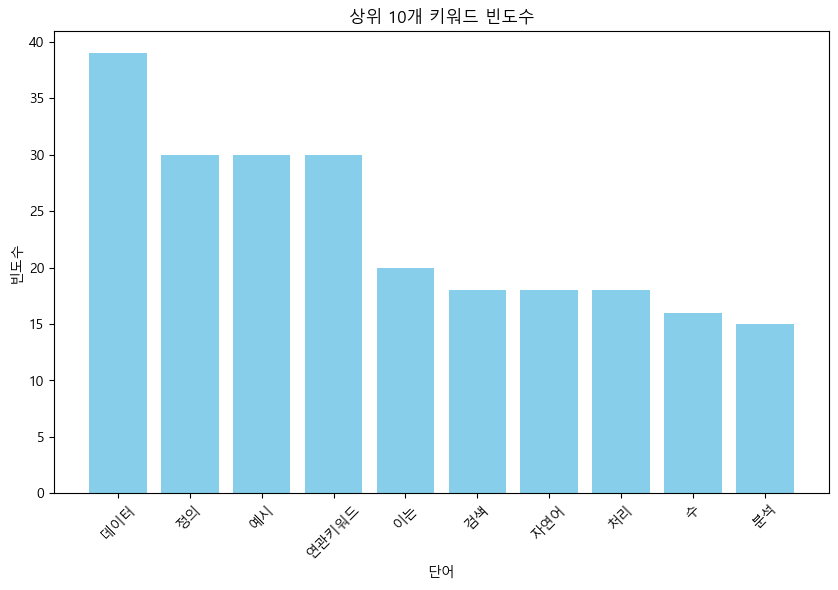

In [7]:
import re
import matplotlib.pyplot as plt
from collections import Counter


# 폰트 설정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows
# font_path = "/System/Library/Fonts/AppleGothic.ttf"  # MacOS 경우
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


#단어 빈도 계산
with open("./data/appendix-keywords.txt", encoding="utf-8") as f:
    text = f.read()
    
    
# 전처리 및 토큰화
text = text.lower()
text = re.sub(r'[^a-zA-Z가-힣\s]', '', text)
words = text.split()
stopwords = set(['the', 'is', 'in', 'and', 'to', '있습니다', '그리고', '입니다'])
words = [word for word in words if word not in stopwords]

#단어빈도 계산
word_freq = Counter(words)
top_n = 10
common_words = word_freq.most_common(top_n)

# 막대그래프 그리기
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title(f'상위 {top_n}개 키워드 빈도수')
plt.xticks(rotation=45)
plt.show()


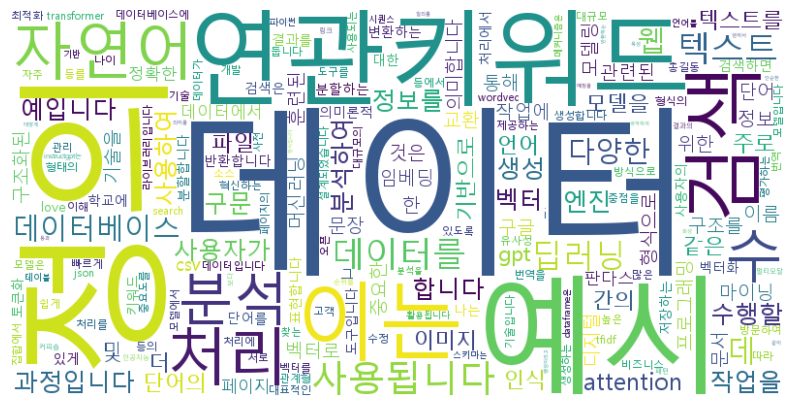

In [8]:
from wordcloud import WordCloud

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='malgun.ttf',  # 한글 폰트 경로 (한글이 포함된 경우 필요)
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


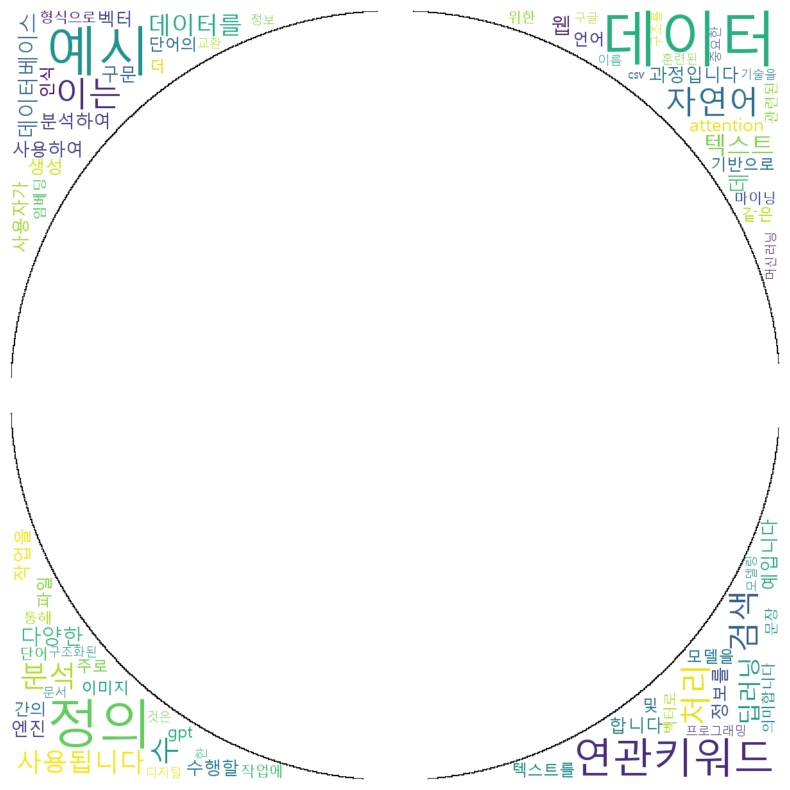

In [15]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from collections import Counter
import re

try:
# 텍스트 전처리 및 단어 빈도 계산
    with open("./data/appendix-keywords.txt", encoding="utf-8") as f:
        text = f.read()

    text = text.lower()
    text = re.sub(r'[^a-zA-Z가-힣\s]', '', text)
    words = text.split()
    stopwords = set(['the', 'is', 'in', 'and', 'to', '있습니다', '그리고', '입니다'])
    words = [word for word in words if word not in stopwords]
    word_freq = Counter(words)

# Pillow로 원형 마스크 이미지 생성
    size = (800, 800)
    mask_img = Image.new('L', size, 0)  # 배경은 검정색(0)
    draw = ImageDraw.Draw(mask_img)
    draw.ellipse((0, 0) + size, fill=255)  # 원형 영역만 흰색(255)으로 설정

# NumPy 배열로 변환하여 마스크 적용
    mask = np.array(mask_img)

  # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='malgun.ttf',       # 한글 폰트 경로
        background_color='white',
        mask=mask,
        contour_color='black',
        contour_width=1,
        max_font_size=100,            # 글자 크기 조절
        scale=1.5,                    # 글자 밀도 조절
        min_font_size=10,             # 최소 글자 크기 설정
        collocations=False,            # 단어의 조합 사용하지 않도록 설정
        prefer_horizontal=0.8          # 수평 배치 우선 순위 조정
    ).generate_from_frequencies(word_freq)
    
# 워드클라우드 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error: {e}")